Urban Data Science & Smart Cities <br>
URSP688Y Spring 2025<br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

# Exercise04

This last exercise is an opportunity for you to get started on your final project. Please identify a portion of your project to get started on and submit a notebook (and any other related files) where you:

1. State the question you are aiming to address with this portion of your analysis
2. Outline the approach you will use to answer that question (pseudocode or you can start to more formally outline the approach section for your final narrative)
3. Operationalize your approach with data and code that you can later slot into your final analysis

## Submitting

Please make a pull request with all of your code and reasonably-sized data in a folder with your first name. See the example with my name in the `exercise04` directory.

If you have datasets that are too large for GitHub or should not be made public, please upload them to a cloud location (e.g., Google Drive) to which I (and ideally your classmates) have access. Please also provide instructions for how someone running your code should properly locate or connect to these files so the analysis will run properly. For example, should they copy and paste the files into the same directory as your notebook, or a provided `data` directory? Best practice is to include these instructions in a separate ReadMe.md or ReadMe.txt file, or at the top of your notebook.

#### ~ Sam's Exercise 04 Begins Here ~

# The Red Line Divide: Examining Housing Affordability Changes Near Montgomery County Metro Stations



Core Question:
How has housing affordability changed near west vs east Red Line Metorrail stations in Montgomery County over the past decade? 


In Montgomery County, the west side of the Red Line is generally wealthier and more expensive to live in than the east side. This analysis will use Python to spatially and statistically measure housing change patterns on each side of the Red Line metrorail corridor. 

In [1]:
# Pseudocode for Data Collection

# Collect spatial data for Montgomery County Metrorail stations from Montgomery County Planning Department
# Collect census tract data for housing affordability metrics for both 2023 and 2013 (5-Year ACS)
    # Median Hosuehold Income
    # Median Gross Rent
    # Median Home Value
    # % Renters vs Owners

## Time to import and clean some data!

In [2]:
import pandas as pd
import os

# Create directories for raw and cleaned data
raw_dir = 'Census Data/'
cleaned_dir = 'Census Data/cleaned/'

os.makedirs(cleaned_dir, exist_ok=True)

# List of files to clean
files = [
    '2023 5-year MHI.csv',
    '2013 5-year MHI.csv',
    '2023 5-year Median Gross Rent.csv',
    '2013 5-year Median Gross Rent.csv',
    '2023 5-year Median Value.csv',
    '2013 5-year Median Value.csv',
    '2023 5-year Renter v Owner.csv',
    '2013 5-year Renter v Owner.csv'
]

# Function to clean the census data file
def clean_census_file(filename):
    df = pd.read_csv(os.path.join(raw_dir, filename))

    # Print the columns to check the format of the data
    print("Columns in the file:", df.columns)

    # Create dictionaries to store the new column names
    new_column_names = {}

    # Iterate over the columns to process Estimate and Margin of Error columns
    for col in df.columns:
        if '!!Estimate' in col:
            # Extract the tract number (e.g., '7001.01')
            tract_number = col.split('!!')[0].split('Census Tract ')[-1].split(',')[0].strip()
            geo_id = '24031' + tract_number.replace('.', '')  # FIPS code + tract number without extra zero-padding
            new_column_names[col] = f'{geo_id} Estimate'  # Renaming Estimate columns
            
        elif '!!Margin of Error' in col:
            # Extract the tract number (e.g., '7001.01')
            tract_number = col.split('!!')[0].split('Census Tract ')[-1].split(',')[0].strip()
            geo_id = '24031' + tract_number.replace('.', '')  # FIPS code + tract number without extra zero-padding
            new_column_names[col] = f'{geo_id} Margin of Error'  # Renaming Margin of Error columns

    # Rename the columns in the dataframe
    df.rename(columns=new_column_names, inplace=True)

    # Save the cleaned data
    cleaned_filename = filename.replace('.csv', '_cleaned.csv')
    df.to_csv(os.path.join(cleaned_dir, cleaned_filename), index=False)
    print(f'Cleaned {filename} → {cleaned_filename}')

# Clean all files
for f in files:
    clean_census_file(f)

print("Done cleaning all files!")


Columns in the file: Index(['Label (Grouping)',
       'Census Tract 7001.01; Montgomery County; Maryland!!Estimate',
       'Census Tract 7001.01; Montgomery County; Maryland!!Margin of Error',
       'Census Tract 7001.03; Montgomery County; Maryland!!Estimate',
       'Census Tract 7001.03; Montgomery County; Maryland!!Margin of Error',
       'Census Tract 7001.04; Montgomery County; Maryland!!Estimate',
       'Census Tract 7001.04; Montgomery County; Maryland!!Margin of Error',
       'Census Tract 7001.05; Montgomery County; Maryland!!Estimate',
       'Census Tract 7001.05; Montgomery County; Maryland!!Margin of Error',
       'Census Tract 7002.04; Montgomery County; Maryland!!Estimate',
       ...
       'Census Tract 7060.09; Montgomery County; Maryland!!Estimate',
       'Census Tract 7060.09; Montgomery County; Maryland!!Margin of Error',
       'Census Tract 7060.10; Montgomery County; Maryland!!Estimate',
       'Census Tract 7060.10; Montgomery County; Maryland!!Margin 

In [3]:
# Import Metrorail station and census tract data and confirm CRS match
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load the GeoJSON files
metro_stations = gpd.read_file('Metro Stations/Maryland_Transit_-_WMATA_Metro_Stops.geojson')
census_tracts = gpd.read_file('Census Tracts/Maryland_Census_Boundaries_-_Census_Tracts_2020.geojson')

# 2. Check the Coordinate Reference Systems (CRS)
print("Metro Stations CRS:", metro_stations.crs)
print("Census Tracts CRS:", census_tracts.crs)


Metro Stations CRS: EPSG:4326
Census Tracts CRS: EPSG:4326


In [4]:
print(metro_stations.columns)
print(metro_stations.head())

Index(['OBJECTID', 'GIS_ID', 'NAME', 'WEB_URL', 'ADDRESS', 'MetroLine',
       'geometry'],
      dtype='object')
   OBJECTID  GIS_ID                  NAME  \
0         1  mstn_1  College Park-U of Md   
1         2  mstn_2       Capitol Heights   
2         3  mstn_3      Morgan Boulevard   
3         4  mstn_4  Georgia Ave Petworth   
4         5  mstn_5                Takoma   

                                             WEB_URL  \
0  http://www.wmata.com/rail/station_detail.cfm?s...   
1  http://www.wmata.com/rail/station_detail.cfm?s...   
2  http://www.wmata.com/rail/station_detail.cfm?s...   
3  http://www.wmata.com/rail/station_detail.cfm?s...   
4  http://www.wmata.com/rail/station_detail.cfm?s...   

                                   ADDRESS             MetroLine  \
0      4931 CALVERT ROAD, COLLEGE PARK, MD         green, yellow   
1  133 CENTRAL AVENUE, CAPITOL HEIGHTS, MD  blue, orange, silver   
2   300 GARRETT MORGAN BLVD., LANDOVER, MD  blue, orange, silver   
3   37

In [5]:
# Filter to only Red Line stations
red_line_stations = metro_stations[metro_stations['MetroLine'] == 'red']

# Reproject both datasets to Maryland State Plane (meters)
red_line_stations = red_line_stations.to_crs(epsg=26985)
census_tracts = census_tracts.to_crs(epsg=26985)

# Buffer stations by half a mile (804.672 meters)
red_line_buffers = red_line_stations.copy()
red_line_buffers['geometry'] = red_line_buffers.buffer(804.672)

# Spatial join: find census tracts that intersect with any Red Line buffer
tracts_near_red_line = gpd.sjoin(census_tracts, red_line_buffers, how='inner', predicate='intersects')


In [6]:
# Save to GeoJSON
tracts_near_red_line.to_file('Metro Stations/Red_Line_Adjacent_Census_Tracts.geojson', driver='GeoJSON')

# Save to CSV (attribute data only, without geometry)
tracts_near_red_line.drop(columns='geometry').to_csv('Metro Stations/Red_Line_Adjacent_Census_Tracts.csv', index=False)


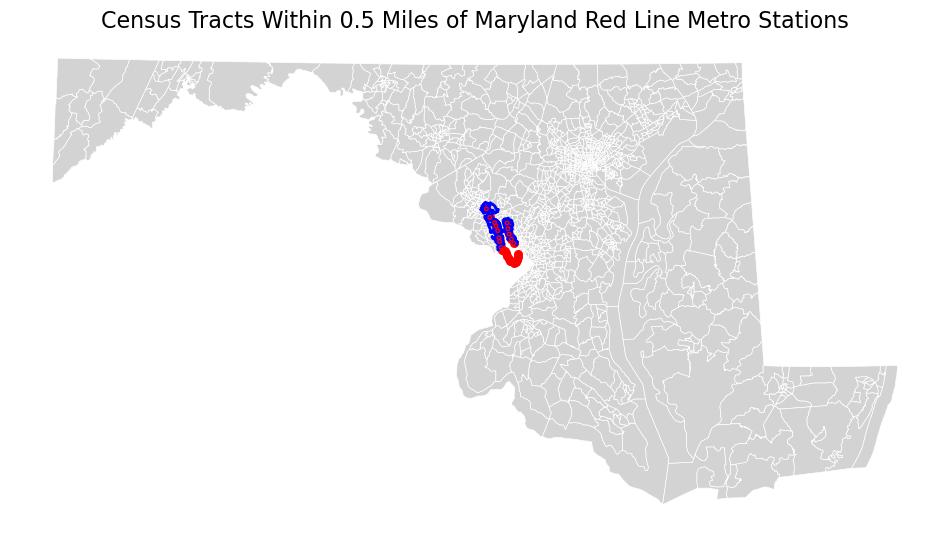

In [7]:
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot all census tracts in light gray
census_tracts.to_crs(epsg=26985).plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

# Plot only the Red Line half-mile buffers in transparent red
red_line_buffers.boundary.plot(ax=ax, color='red', linewidth=1)

# Plot Red Line stations as red points
red_line_stations.to_crs(epsg=26985).plot(ax=ax, color='red', markersize=30)

# Plot the selected census tracts in blue
tracts_near_red_line.to_crs(epsg=26985).plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2)

# Title and axes off
ax.set_title('Census Tracts Within 0.5 Miles of Maryland Red Line Metro Stations', fontsize=16)
ax.axis('off')

# Show the plot
plt.show()


In [8]:
print(tracts_near_red_line.columns)
print(tracts_near_red_line.head(1))


Index(['ShapeSTArea', 'ShapeSTLength', 'OBJECTID_left', 'STATEFP20',
       'COUNTYFP20', 'TRACTCE20', 'GEOID20', 'NAME20', 'NAMELSAD20', 'MTFCC20',
       'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20',
       'geometry', 'index_right', 'OBJECTID_right', 'GIS_ID', 'NAME',
       'WEB_URL', 'ADDRESS', 'MetroLine'],
      dtype='object')
     ShapeSTArea  ShapeSTLength  OBJECTID_left STATEFP20 COUNTYFP20 TRACTCE20  \
66  3.741338e+06   12628.743077           1667        24        031    701219   

        GEOID20   NAME20    NAMELSAD20 MTFCC20  ...   INTPTLAT20  \
66  24031701219  7012.19  Census Tract   G5020  ...  +39.0593842   

      INTPTLON20                                           geometry  \
66  -077.1095765  POLYGON ((389487.247 155025.714, 389484.474 15...   

   index_right OBJECTID_right   GIS_ID         NAME  \
66          39             40  mstn_40  White Flint   

                                              WEB_URL  \
66  http://www.wmata.com/rail/sta

In [9]:
# Print just a few columns from the 'tracts_near_red_line' GeoDataFrame
print(tracts_near_red_line[['GEOID20', 'NAME20', 'NAMELSAD20']])

          GEOID20   NAME20    NAMELSAD20
66    24031701219  7012.19  Census Tract
66    24031701219  7012.19  Census Tract
74    24031704806  7048.06  Census Tract
74    24031704806  7048.06  Census Tract
75    24031704803  7048.03  Census Tract
...           ...      ...           ...
1095  24031705501  7055.01  Census Tract
1315  24031700718  7007.18  Census Tract
1333  24031704404  7044.04  Census Tract
1440  24031700905  7009.05  Census Tract
1457  24031701216  7012.16  Census Tract

[73 rows x 3 columns]
